In [95]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator
from statsmodels.tools.eval_measures import rmse
from pmdarima import auto_arima
from datetime import datetime
from datetime import timedelta

# SKlearn Library

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

plt.style.use('seaborn')
%matplotlib inline

In [58]:
confirmed_cases = pd.read_csv("/Users/antonyvibin/Desktop/Covid19/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")


In [59]:
# Separating Confirmed cases for India

India_confirmed = confirmed_cases[confirmed_cases["Country/Region"] == 'India']

In [60]:
India_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,...,244,330,396,499,536,657,727,887,987,1024


In [61]:
india_df = India_confirmed.transpose().reset_index()
india_df = india_df.iloc[4:,:]
india_df.columns = ["Dates", "Count"]

In [62]:
# Replacing null values to 0 and Removing Null Values

india_df = india_df.replace(0, np.nan)
india_df = india_df.dropna()

In [63]:
# Confirmed cases in India Cases and timeseries conversion

india_df = india_df.reset_index(drop = True)

india_df["Dates"] = pd.to_datetime(india_df.Dates)
india_df = india_df.set_index("Dates")

In [64]:
india_df 

,Count
Dates,
2020-01-30,1.0
2020-01-31,1.0
2020-02-01,1.0
2020-02-02,2.0
2020-02-03,3.0
2020-02-04,3.0
2020-02-05,3.0
2020-02-06,3.0
2020-02-07,3.0


In [65]:
# Finding the shape of dataframe
india_df.shape

(60, 1)

### Building ARIMA model to forecaset corona in India for the next 10 days

In [222]:
train, test = india_df[:60], india_df[60:]

### ARIMA Model

[]

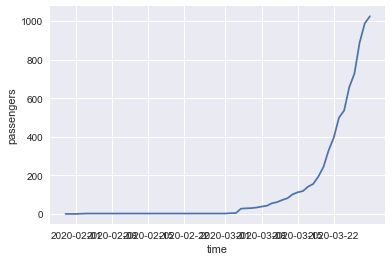

In [229]:
#visualizing timeseries data
import matplotlib.pyplot as plt
plt.plot(india_df)
plt.xlabel('time')
plt.ylabel('passengers')
plt.plot()

In [230]:
#training model
model = auto_arima(train, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,
                  stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
#fitting model
model.fit(train)

Fit ARIMA: (0, 2, 0)x(0, 0, 0, 1) (constant=True); AIC=540.264, BIC=544.385, Time=0.009 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 1) (constant=True); AIC=518.462, BIC=524.644, Time=0.049 seconds
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 1) (constant=True); AIC=516.955, BIC=525.197, Time=0.041 seconds
Fit ARIMA: (0, 2, 3)x(0, 0, 0, 1) (constant=True); AIC=509.757, BIC=520.059, Time=0.213 seconds
Fit ARIMA: (0, 2, 4)x(0, 0, 0, 1) (constant=True); AIC=509.906, BIC=522.269, Time=0.158 seconds
Fit ARIMA: (0, 2, 5)x(0, 0, 0, 1) (constant=True); AIC=510.390, BIC=524.814, Time=0.190 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 1) (constant=True); AIC=514.876, BIC=521.057, Time=0.018 seconds
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 1) (constant=True); AIC=516.022, BIC=524.264, Time=0.034 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 1) (constant=True); AIC=517.650, BIC=527.952, Time=0.059 seconds
Fit ARIMA: (1, 2, 3)x(0, 0, 0, 1) (constant=True); AIC=515.265, BIC=527.628, Time=0.097 seconds
Fit ARIMA: (1, 2, 4)x(0, 0, 0, 1) (const

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 1),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [231]:
#predicting values and evaluating model
y_pred = model.predict(n_periods=10)
from sklearn.metrics import r2_score
#acc = r2_score(test.Count, y_pred)
#print(acc)

In [232]:
y_pred

array([1078.95375089, 1081.0116391 , 1147.43823946, 1215.02995148,
       1283.78677515, 1353.70871048, 1424.79575747, 1497.04791611,
       1570.46518641, 1645.04756837])

In [233]:
test

,Count
Dates,


In [249]:
flag = 0
nx_10 = pd.DataFrame(columns = ["Dates", "Nx 10 days Confirmed Cases in India"])
count_list = list(range(10))
test_time = train.index[59]
for i in count_list:
    nx_10.loc[i] = {"Dates" : test_time, "Nx 10 days Confirmed Cases in India" : y_pred[i]}
    test_time = test_time + timedelta(days = 1)

In [250]:
nx_10

,Dates,Nx 10 days Confirmed Cases in India
0,2020-03-29,1078.953751
1,2020-03-30,1081.011639
2,2020-03-31,1147.438239
3,2020-04-01,1215.029951
4,2020-04-02,1283.786775
5,2020-04-03,1353.708710
6,2020-04-04,1424.795757
7,2020-04-05,1497.047916
8,2020-04-06,1570.465186
9,2020-04-07,1645.047568


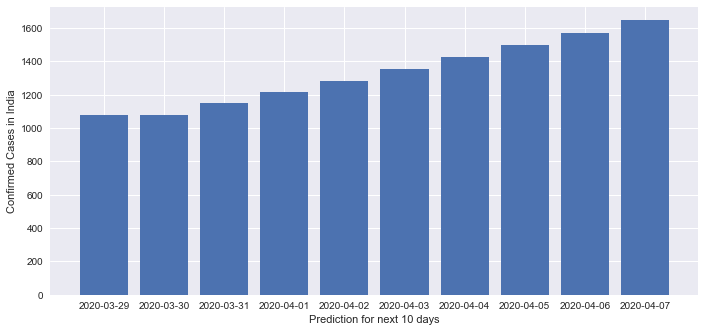

In [251]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,1,1.5,1])
langs = nx_10["Dates"]
students = nx_10["Nx 10 days Confirmed Cases in India"]
ax.bar(langs,students)
ax.set_xlabel('Prediction for next 10 days')
ax.set_ylabel('Confirmed Cases in India')
plt.show()